# Installing and loading all necessary libraries

In [1]:
# installing and loading all necessary libraries
!pip install statsmodels matplotlib
!pip install folium
import folium
import statsmodels.api as sm
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA


# Loading the airbnb listings dataset

In [2]:
# load xlsx file
df = pd.read_csv('C:/Users/subas/Downloads/Airbnb Project Dataset/listings.csv')


# print the dataframe
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7031 entries, 0 to 7030
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              7031 non-null   int64  
 1   name                            7031 non-null   object 
 2   host_id                         7031 non-null   int64  
 3   host_name                       7031 non-null   object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   7031 non-null   object 
 6   latitude                        7031 non-null   float64
 7   longitude                       7031 non-null   float64
 8   room_type                       7031 non-null   object 
 9   price                           7031 non-null   int64  
 10  minimum_nights                  7031 non-null   int64  
 11  number_of_reviews               7031 non-null   int64  
 12  last_review                     61

# Task 1: Data preprocessing

In [3]:
## 1) Deciding which columns to work with
## We want to keep the information from the dataset as much as possible while removing those
## irrelevant columns. Removing the irrelevant information could effectively reduce the
## unnecessary information and avoid the curse of dimensionality, thus to increase the model’s
## performance.

# delete neighbourhood group and licence column because it doesnot have
# any value inside
df = df.drop(columns=['neighbourhood_group'])
df = df.drop(columns=['license'])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7031 entries, 0 to 7030
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              7031 non-null   int64  
 1   name                            7031 non-null   object 
 2   host_id                         7031 non-null   int64  
 3   host_name                       7031 non-null   object 
 4   neighbourhood                   7031 non-null   object 
 5   latitude                        7031 non-null   float64
 6   longitude                       7031 non-null   float64
 7   room_type                       7031 non-null   object 
 8   price                           7031 non-null   int64  
 9   minimum_nights                  7031 non-null   int64  
 10  number_of_reviews               7031 non-null   int64  
 11  last_review                     6159 non-null   object 
 12  reviews_per_month               61

In [4]:
########################## 2) Cleaning prices and dealing with missing values #############################################
###################   Operations to change the currency to float values and drop the rows with Nan values  ################

# This will remove any row that has at least one NaN value
df.dropna(inplace=True)

#change price datatype from int to float
df['price'] = df['price'].astype(float)

df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6159 entries, 0 to 6994
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              6159 non-null   int64  
 1   name                            6159 non-null   object 
 2   host_id                         6159 non-null   int64  
 3   host_name                       6159 non-null   object 
 4   neighbourhood                   6159 non-null   object 
 5   latitude                        6159 non-null   float64
 6   longitude                       6159 non-null   float64
 7   room_type                       6159 non-null   object 
 8   price                           6159 non-null   float64
 9   minimum_nights                  6159 non-null   int64  
 10  number_of_reviews               6159 non-null   int64  
 11  last_review                     6159 non-null   object 
 12  reviews_per_month               61

In [5]:
df.describe()

id       host_id     latitude    longitude         price  \
count  6.159000e+03  6.159000e+03  6159.000000  6159.000000   6159.000000   
mean   1.710564e+17  1.277584e+08   -38.366650   143.835882    361.246144   
std    3.056731e+17  1.310522e+08     0.207087     0.838585    519.028538   
min    2.130200e+04  1.386900e+04   -38.848060   141.001200     20.000000   
25%    2.180285e+07  3.163911e+07   -38.463849   143.661819    200.000000   
50%    4.256788e+07  8.458691e+07   -38.334440   144.190860    295.000000   
75%    5.408080e+07  1.680670e+08   -38.263190   144.373551    440.000000   
max    8.480920e+17  5.060238e+08   -37.210890   144.717730  36408.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count     6159.000000        6159.000000        6159.000000   
mean         2.460140          50.724793           1.453541   
std         14.002853          87.180256           1.623650   
min          1.000000           1.000000           0.010000   
25%          2.000000           6.000000           0.340000   
50%          2.000000          18.000000           0.960000   
75%          2.000000          59.000000           1.975000   
max       1000.000000        1018.000000          15.600000   

       calculated_host_listings_count  availability_365  number_of_reviews_ltm  
count                     6159.000000       6159.000000            6159.000000  
mean                        54.327651        185.743302              13.101640  
std                        139.419803        125.523449              18.875072  
min                          1.000000          0.000000               0.000000  
25%                          1.000000         71.000000               2.000000  
50%                          2.000000        175.000000               6.000000  
75%                         31.000000        312.000000              17.000000  
max                        596.000000        365.000000             186.000000

In [6]:
df.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

C:\Users\subas\AppData\Local\Temp\ipykernel_8860\3129850035.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
C:\Users\subas\AppData\Local\Temp\ipykernel_8860\3129850035.py:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  df.corr().style.background_gradient(cmap='coolwarm').set_precision(2)


# Task 2: Exploratory Data Analysis (EDA) with Data Visualization

In [7]:
#So, let's find out what neighbpurhood our listings belong to, and
# in what proportion:
distinct_cities = df['neighbourhood'].unique()
print(distinct_cities)


['Surf Coast' 'Moyne' 'Greater Geelong' 'Southern Grampians' 'Colac Otway'
 'Corangamite' 'Warrnambool' 'Glenelg' 'Queenscliffe']


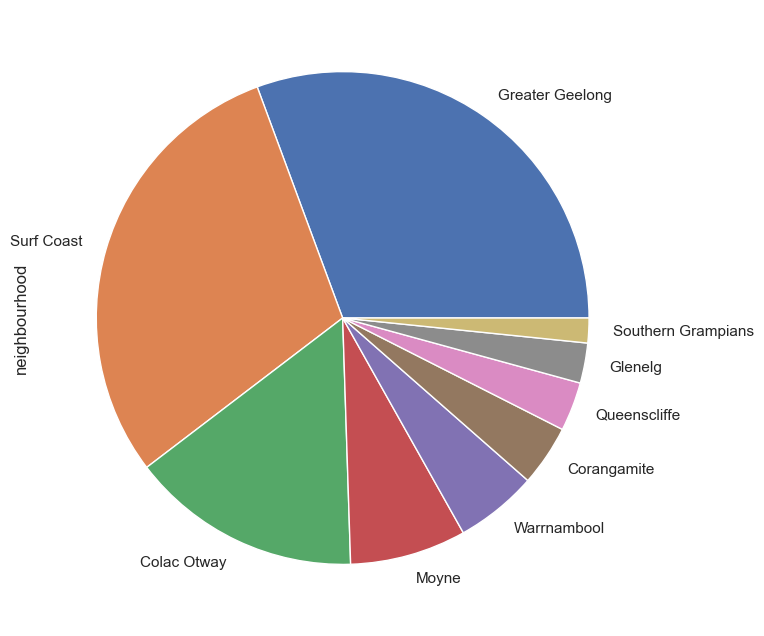

In [8]:
sns.set(rc={'figure.figsize':(15,8)})
df['neighbourhood'].value_counts().plot(kind='pie')
plt.show()


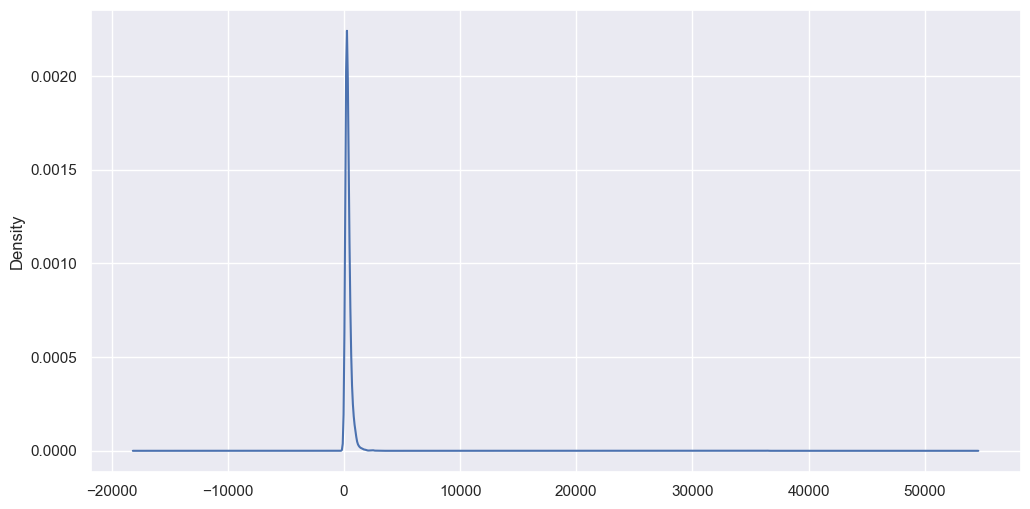

In [9]:
# checking price density plot

# Increase the size of the plot (width=15, height=8)
plt.figure(figsize=(12,6))

# Create the density plot
df['price'].plot(kind='density')

# Display the plot
plt.show()

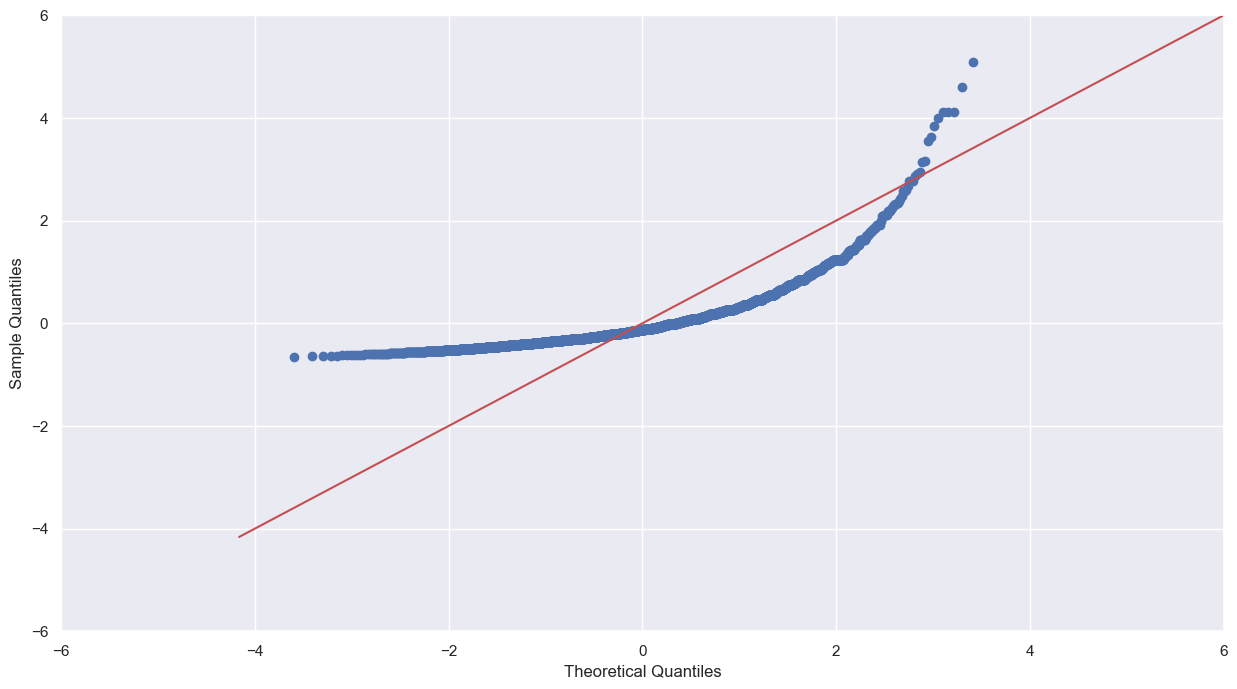

In [10]:

# Create QQ plot
fig = sm.qqplot(df['price'], line='45', fit=True)
# Set axes limits to zoom in
plt.axis([-6, 6, -6, 6]) 
plt.show()

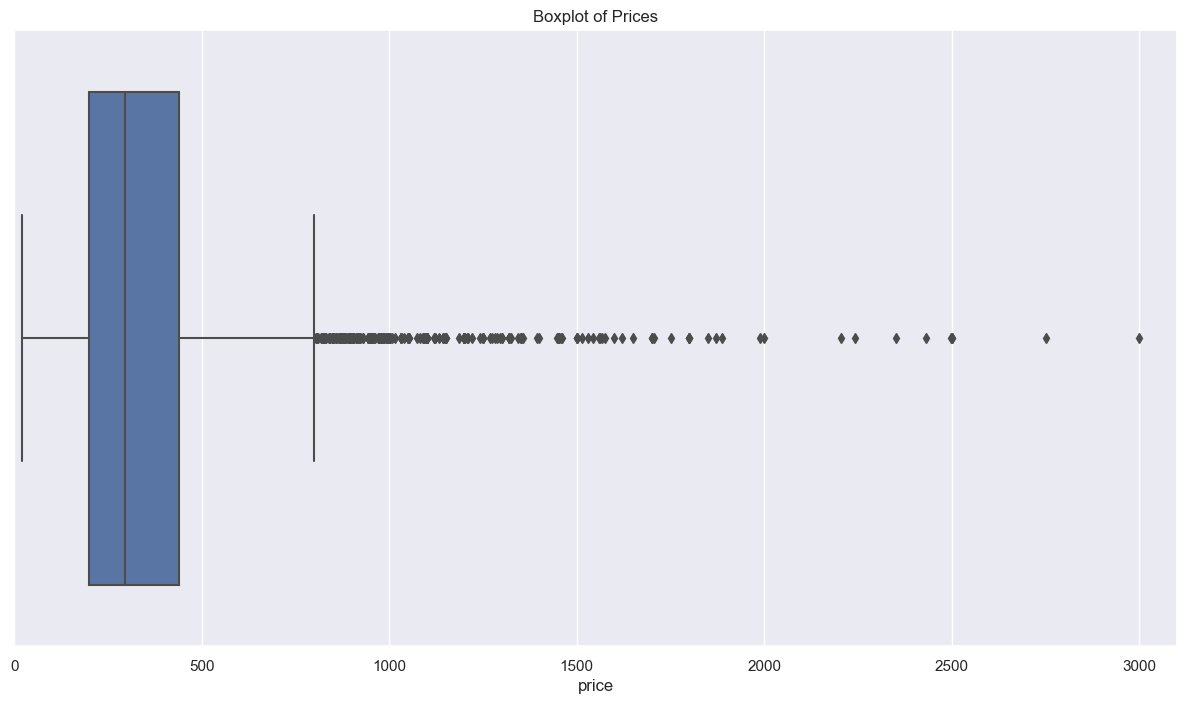

Q1:  200.0
Q3:  440.0
The Interquartile Range (IQR) of the price data is:  240.0


In [11]:


sns.boxplot(x = df['price'])
plt.title("Boxplot of Prices")
# Set the x-axis limits
plt.xlim(0, 3100)
plt.show()

Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)

IQR = Q3 - Q1
print('Q1: ',Q1)
print('Q3: ',Q3)
print('The Interquartile Range (IQR) of the price data is: ', IQR)




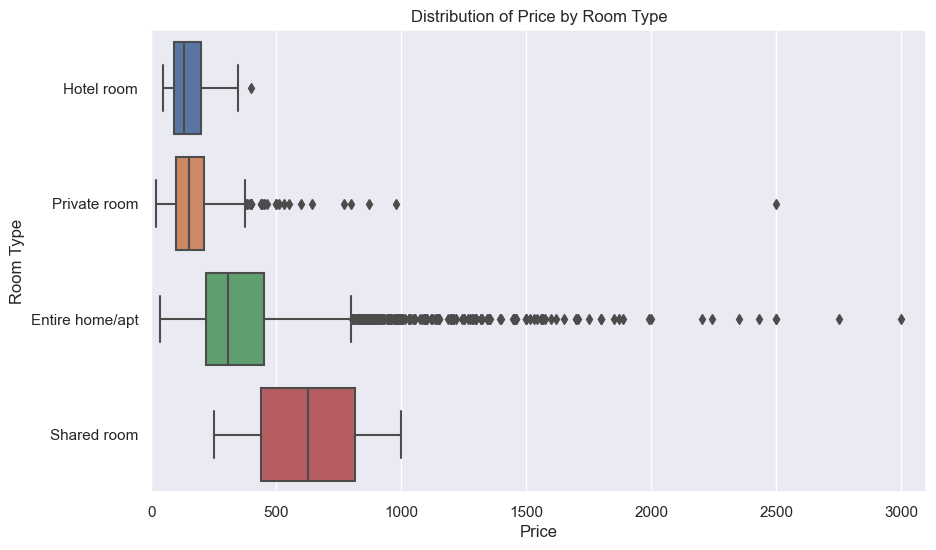

In [12]:
##################### 3. price column visualization: With boxplot we can visualize price distribution for each property type ###


# Calculate the ranks based on median price
ranks = df.groupby("room_type")["price"].median().sort_values(ascending=True).index

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='price', y='room_type', orient='h', order=ranks)

# Set the x-axis limits
plt.xlim(0, 3100)

# Set the axis labels and title
plt.xlabel('Price')
plt.ylabel('Room Type')
plt.title('Distribution of Price by Room Type')

# Show the plot
plt.show()


In [13]:
########################## 4. Room type distribution on maps #############################################

# Create a map centered around the mean latitude and longitude
map_center = [df['latitude'].mean(), df['longitude'].mean()]

# Create a color palette for different room types
color_palette = {
    'Entire home/apt': 'blue',
    'Private room': 'green',
    'Shared room': 'red',
    'Hotel room': 'yellow'  
}

# Create the map
m = folium.Map(location=map_center, zoom_start=12)

# Iterate over the dataframe rows
for _, row in df.iterrows():
    room_type = row['room_type']
    lat = row['latitude']
    lon = row['longitude']
    
    # Create a marker for each room with a color based on room type
    folium.CircleMarker(location=[lat, lon], radius=5, color=color_palette[room_type], fill=True, fill_color=color_palette[room_type]).add_to(m)

print('Entire home/apt: blue\n',
    'Private room : green\n',
    'Shared room : red\n',
    'Hotel room : yellow')
   
# Display the map
m



Entire home/apt: blue
 Private room : green
 Shared room : red
 Hotel room : yellow


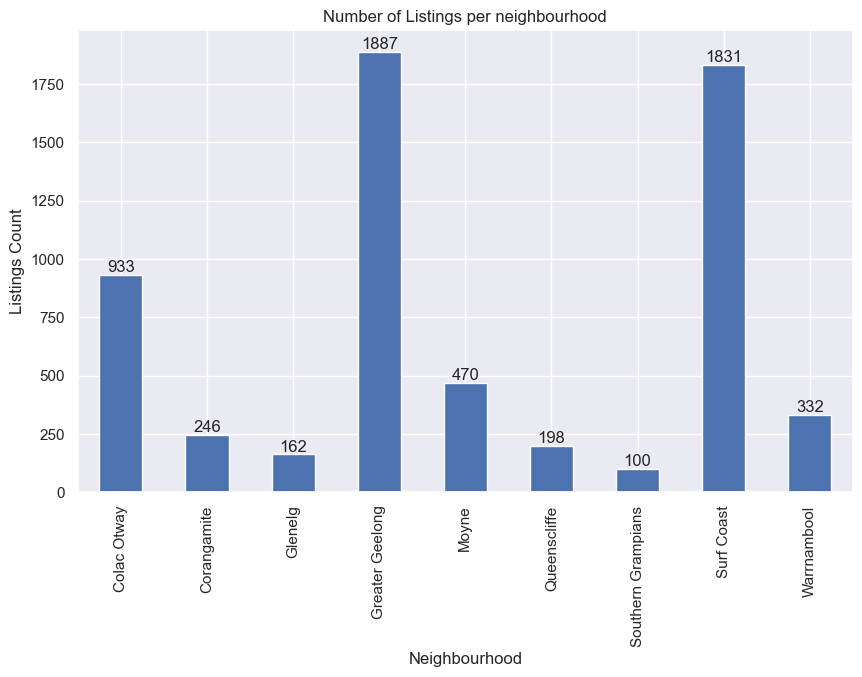

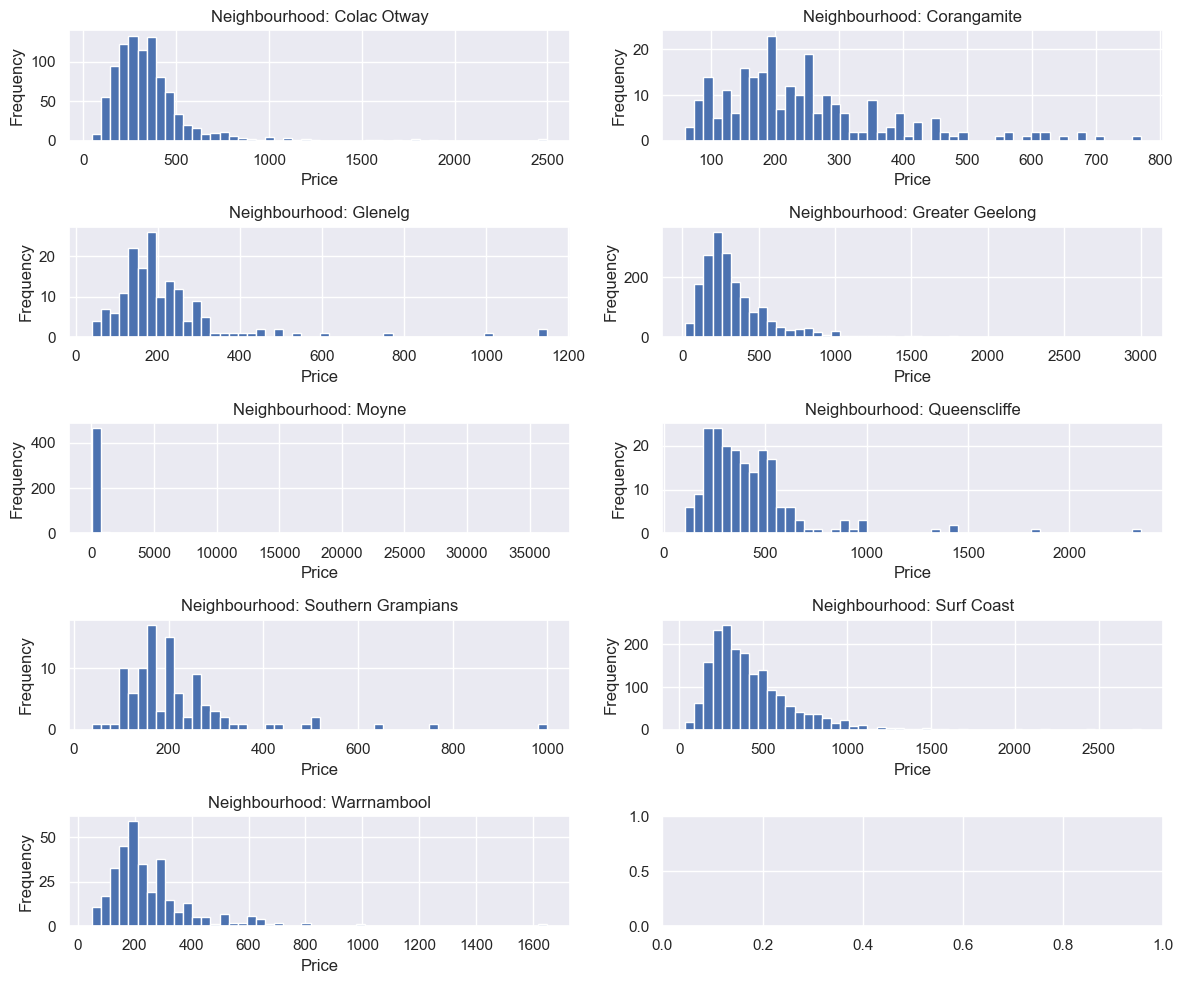

In [14]:
############# 5.number of room type in each region and price distribution for each neighbourhood ###########################


# Group the data by neighbourhood and calculate the count of each neighbourhood
neighbourhood_counts = df.groupby('neighbourhood').size()

# Plot the count of listings for each neighbourhood
ax = neighbourhood_counts.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Neighbourhood')
plt.ylabel('Listings Count')
plt.title('Number of Listings per neighbourhood')

# Add numbers on top of each bar
for p in ax.patches:
    ax.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()

# Group the data by 'neighbourhood' and create separate histograms for each group
grouped = df[['price', 'neighbourhood']].groupby('neighbourhood')

# Calculate the number of rows and columns for the subplot grid
num_groups = len(grouped)
num_rows = math.ceil(num_groups / 2)
num_cols = min(num_groups, 2)

# Create the subplot grid
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 10))

# Iterate over the groups and plot histograms
for i, (neighbourhood, group) in enumerate(grouped):
    # Calculate the subplot position
    row = i // num_cols
    col = i % num_cols
    
    # Select the corresponding axis
    ax = axes[row, col]
    
    # Plot the histogram
    group['price'].plot(kind='hist', bins=50, ax=ax, legend=False)
    ax.set_xlabel('Price')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Neighbourhood: {neighbourhood}')
    
# Adjust the layout and spacing
plt.tight_layout()

# Display the plot
plt.show()



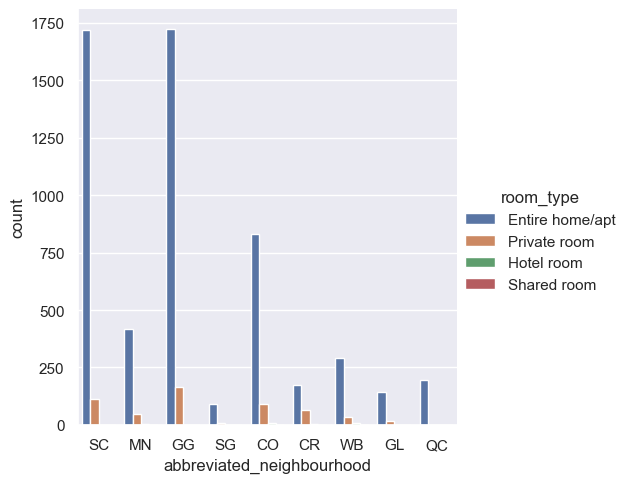

In [15]:
#5.  room type distribution in neighbourhood

# Define the abbreviations for the x-axis labels
abbreviations = {
    'Surf Coast': 'SC',
    'Moyne': 'MN',
    'Greater Geelong': 'GG',
    'Southern Grampians': 'SG',
    'Colac Otway': 'CO',
    'Corangamite': 'CR',
    'Warrnambool': 'WB',
    'Glenelg': 'GL',
    'Queenscliffe': 'QC'
}
# Filter the data and create a bar plot
filtered_df = df[df['neighbourhood'].isin(abbreviations.keys())]

# Replace the x-axis labels with the abbreviations
filtered_df['abbreviated_neighbourhood'] = filtered_df['neighbourhood'].map(abbreviations)

sns.catplot(data=filtered_df, x='abbreviated_neighbourhood', hue='room_type', kind='count')

#plt.axis([0, 2000, 0, 2000]) 
plt.show()


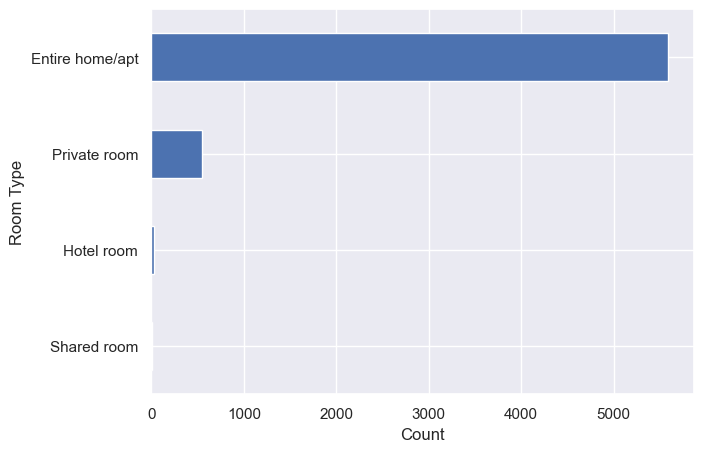

In [16]:
# the room_type column

grouped_room_type = df.groupby('room_type')

# Calculate the number of rows and columns for the subplot grid
num = len(grouped_room_type)
room_counts = df.groupby('room_type').size().sort_values().tail(num)
room_counts.plot(kind='barh', figsize=(7, 5))
plt.xlabel('Count')
plt.ylabel('Room Type')
plt.show()


In [17]:
###################### 6) Summarize the mean price of accommodations in each market/ each region ########################
#. mean and median price of room type in each market and region
median_prices = df.groupby('neighbourhood')['price'].median()
print('Median Price\n',median_prices)

mean_prices = df.groupby('neighbourhood')['price'].mean()
print('\n\nMean Price \n',mean_prices)
 
# highest median price is queenscliffe



Median Price
 neighbourhood
Colac Otway           310.0
Corangamite           218.0
Glenelg               180.0
Greater Geelong       279.0
Moyne                 262.0
Queenscliffe          367.5
Southern Grampians    196.5
Surf Coast            364.0
Warrnambool           210.0
Name: price, dtype: float64


Mean Price 
 neighbourhood
Colac Otway           352.587353
Corangamite           245.768293
Glenelg               220.876543
Greater Geelong       343.158983
Moyne                 378.197872
Queenscliffe          423.535354
Southern Grampians    219.790000
Surf Coast            427.955762
Warrnambool           255.993976
Name: price, dtype: float64


# Task 3: Building the Accommodation Prediction Model

In [18]:
correlation_matrix = df.corr()
price_correlation = correlation_matrix['price'].drop('price')  # Exclude self-correlation

print(price_correlation)

# the correlation between the 'price' column and other columns is
# very low (close to 0), it suggests that there is little or no linear
# relationship between them. In such cases, using those columns alone 
# may not be sufficient for accurate prediction of the 'price' column but in this project 
# i am using linear regression.


id                               -0.006825
host_id                          -0.034785
latitude                         -0.053682
longitude                         0.062791
minimum_nights                    0.023322
number_of_reviews                -0.085263
reviews_per_month                -0.108340
calculated_host_listings_count    0.089439
availability_365                 -0.002562
number_of_reviews_ltm            -0.086060
Name: price, dtype: float64


C:\Users\subas\AppData\Local\Temp\ipykernel_8860\2464109951.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


In [19]:
# using correlation we drop the columns which have less than correlation than 0.02 
# often referred to as feature selection. The rationale is that features with very low correlation to the target variable
# are unlikely to be useful for prediction and may even degrade model performance by adding noise.


# Calculate the correlation 
correlation_matrix = df.corr()

# Filter the columns with correlation less than 0.02
columns_to_drop = correlation_matrix.columns[correlation_matrix['price'] < 0.02]

# Drop the columns from the DataFrame
df = df.drop(columns_to_drop, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6159 entries, 0 to 6994
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            6159 non-null   object 
 1   host_name                       6159 non-null   object 
 2   neighbourhood                   6159 non-null   object 
 3   longitude                       6159 non-null   float64
 4   room_type                       6159 non-null   object 
 5   price                           6159 non-null   float64
 6   minimum_nights                  6159 non-null   int64  
 7   last_review                     6159 non-null   object 
 8   calculated_host_listings_count  6159 non-null   int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 481.2+ KB


C:\Users\subas\AppData\Local\Temp\ipykernel_8860\1218073401.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


In [20]:
# drop all the object and category column as we are working on numeric columns
# Select columns with data types as int and float
numerical_cols = df.select_dtypes(include=['int', 'float']).columns

# Drop the remaining columns
df = df[numerical_cols]
df.info()


# for removing the outliers in price columns
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)

IQR = Q3 - Q1
print('Q1: ',Q1)
print('Q3: ',Q3)

# remove rows from your DataFrame where the 'price' column value is less than 
# the first quartile (Q1) or more than the third quartile (Q3), 
df = df[(df['price'] >= Q1) & (df['price'] <= Q3)]



<class 'pandas.core.frame.DataFrame'>
Int64Index: 6159 entries, 0 to 6994
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   longitude                       6159 non-null   float64
 1   price                           6159 non-null   float64
 2   minimum_nights                  6159 non-null   int64  
 3   calculated_host_listings_count  6159 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 240.6 KB
Q1:  200.0
Q3:  440.0


In [21]:
# we are making our all the dataframe columns in float datatype
df['minimum_nights'] = df['minimum_nights'].astype(float)
df['calculated_host_listings_count'] = df['calculated_host_listings_count'].astype(float)


In [22]:

# Select specific columns from the original dataframe for later use in visualizing important features selected columns with price.
selected_columns = ['longitude', 'minimum_nights', 'calculated_host_listings_count']
df_selected = df[selected_columns].copy()

df_vectorized = df.copy()
columns_to_exclude = ['price']
features = [col for col in df_vectorized.columns if col not in columns_to_exclude]

df_vectorized['features'] = df_vectorized[features].apply(lambda x: np.array(x), axis=1)
df_vectorized = df_vectorized[['features', 'price']]
df_vectorized.head()


features  price
2   [142.32739, 2.0, 3.0]  200.0
3   [144.68958, 2.0, 1.0]  390.0
6   [142.99437, 1.0, 1.0]  246.0
9   [144.27382, 2.0, 1.0]  250.0
11  [144.54432, 2.0, 1.0]  426.0

In [23]:
############ 7) making linear regression model to implement price prediction of the listings #######################

# Splitting the DataFrame into training and testing sets
train_df, test_df = train_test_split(df_vectorized, test_size=0.2, random_state=42)

# Display the shapes of the resulting DataFrames
print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)

# Convert the Series of lists to a 2D structure
X_train = np.array(train_df['features'].tolist())  
y_train = train_df['price']            # Target variable for training
X_test = np.array(test_df['features'].tolist())    
y_test = test_df['price']             # Target variable for testing

# Perform PCA
pca = PCA(n_components=3)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Creating, training and testing the Linear Regression model
lr = LinearRegression()
dt_model = lr.fit(X_train, y_train)
dt_train_pred_price = dt_model.predict(X_train)
dt_test_pred = dt_model.predict(X_test)

# evaluating the accuracry    
rmse_train = mean_squared_error(y_train, dt_train_pred_price, squared=False)
mae_train = mean_absolute_error(y_train, dt_train_pred_price)
rmse_test = mean_squared_error(y_test, dt_test_pred, squared=False)
mae_test = mean_absolute_error(y_test, dt_test_pred)
    
print("RMSE on train data = %g" % rmse_train)
print("MAE on train data = %g" % mae_train)
print("RMSE on test data = %g" % rmse_test)
print("MAE on test data = %g" % mae_test)
    


Train shape: (2514, 2)
Test shape: (629, 2)
RMSE on train data = 64.9
MAE on train data = 55.0384
RMSE on test data = 65.7231
MAE on test data = 56.1506


Coefficient for PC1: 0.08376608422962091
Coefficient for PC2: 1.9561969117904063
Coefficient for PC3: -6.260680221626002


<Axes: title={'center': 'Feature Importances'}, ylabel='features'>

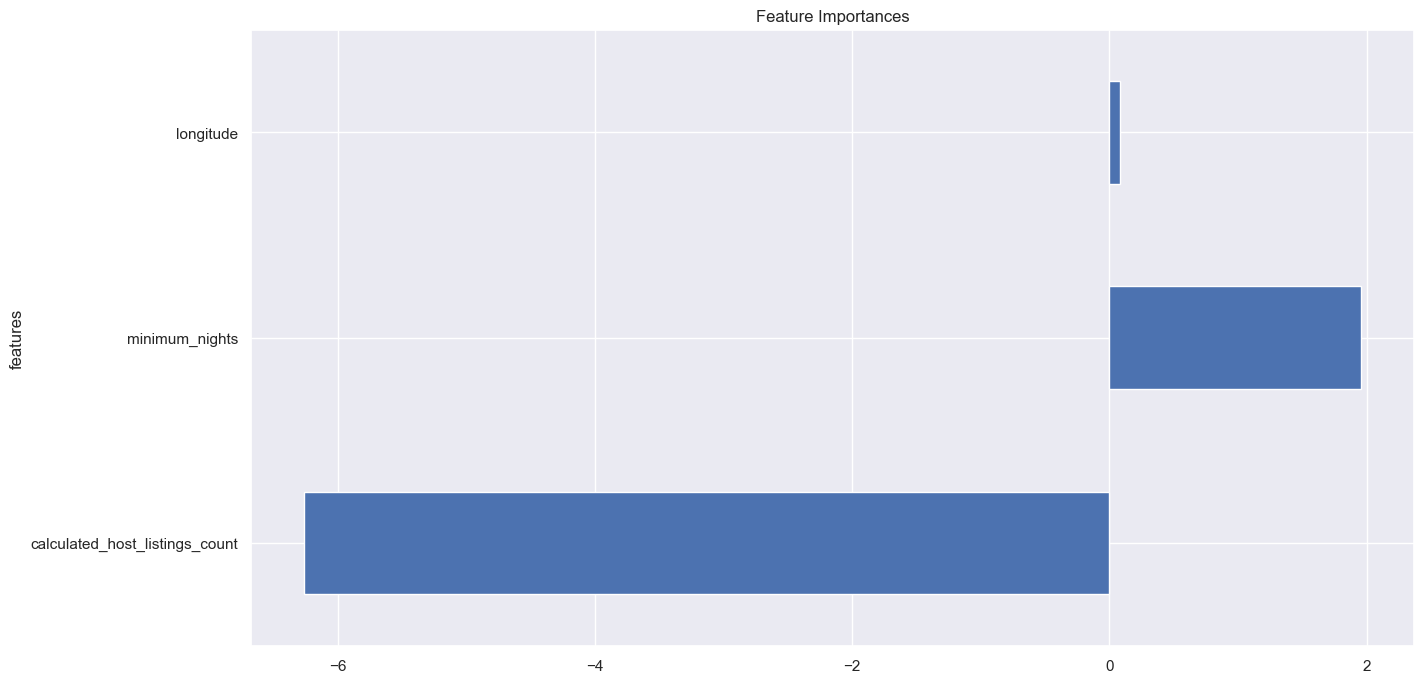

In [24]:
######### 8) Perform an analysis to discuss what kinds features are most related to the price ##################
# Get the coefficients (feature importances) from the trained model
coefs = dt_model.coef_

# Print the coefficients
for i in range(len(coefs)):
    print(f"Coefficient for PC{i+1}: {coefs[i]}")

# Get the feature names
df_cols = df_selected.columns

# Create a DataFrame of feature importances
feature_importances = pd.DataFrame(sorted(list(zip(df_cols, coefs)), key=lambda x: abs(x[1]), reverse=True), columns=['features', 'coef'])

# Visualize the feature importances
feature_importances.plot.barh(x='features', y='coef', legend=False, title='Feature Importances')

In [25]:
#So increase in longitude and minimum nights are positively related to price 
# increase in calulated host listings count decreases price according to
# the dataset and model